In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("DBSCAN_Data.csv")

# Extract the relevant columns
X = data[['Weight', 'Height']].values

In [18]:
# Function to calculate the Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [19]:
# DBSCAN parameters
eps = 0.5  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point


In [20]:
def dbscan(X, eps, min_samples):
    labels = np.full(X.shape[0], -1)  # Initialize labels as -1 (unvisited)
    cluster_id = 0
    
    def region_query(point_index):
        neighbors = []
        for i in range(X.shape[0]):
            if euclidean_distance(X[point_index], X[i]) < eps:
                neighbors.append(i)
        return neighbors
    
    def expand_cluster(point_index, neighbors):
        labels[point_index] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_index = neighbors[i]
            if labels[neighbor_index] == -1:  # Unvisited point
                labels[neighbor_index] = cluster_id
                new_neighbors = region_query(neighbor_index)
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
            elif labels[neighbor_index] == -1:  # Noise point
                labels[neighbor_index] = cluster_id
            i += 1
    
    for point_index in range(X.shape[0]):
        if labels[point_index] == -1:  # Unvisited point
            neighbors = region_query(point_index)
            if len(neighbors) >= min_samples:
                expand_cluster(point_index, neighbors)
                cluster_id += 1
    
    return labels

# Run DBSCAN
labels = dbscan(X, eps, min_samples)

C:\Users\Arsh\AppData\Local\Temp\ipykernel_24904\3927649068.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


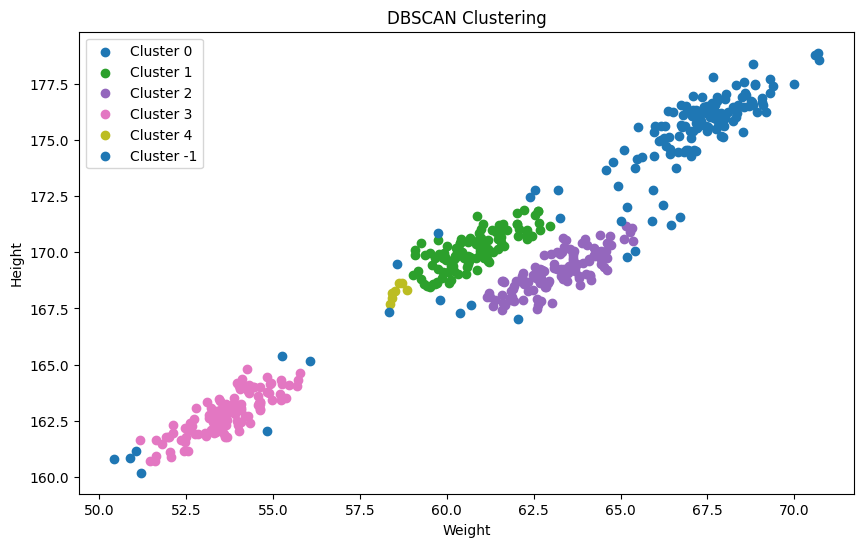

In [21]:
#Plotting it
unique_clusters = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    cluster_data = X[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                color=colors(cluster), label=f'Cluster {cluster}')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()